###### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("cpa.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Filling Blank values by NaN
df['Income'] = df['Income'].replace(' ', np.nan)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
df.drop(['ID'],axis=1,inplace =True)

In [7]:
duplicate = df[df.duplicated(subset=None,keep='first')] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate.shape 
#duplicate

Duplicate Rows :


(182, 28)

In [8]:
#Delete Duplicate Rows
#df= df.drop_duplicates() 

In [9]:
# Categorical Variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

Number of categorical variables:  3


In [10]:
df.shape

(2240, 28)

In [11]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
-----------------------------------------------
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-09-2012    11
12-05-2014    11
14-02-2013    11
20-08-2013    10
              ..
31-07-2012     1
27-03-2014     1
28-03-2014     1
14-11-2012     1
04-08-2013     1
Name: Dt_Customer, Length: 663, dtype: int64
-----------------------------------------------


In [12]:
#Forming New Catagories
Edu={'Basic':'Secondary',
                  '2n Cycle':'Graduation',
                     'Master':'Higher education',
                     'PhD':'Higher education',
                     'Graduation':'Graduation'}
Marital={'Single':'Single',
                     'Alone':'Single',
                     'Widow':'Single',
                     'Divorced':'Single',
                     'Together':'Married',
                     'Married':'Married',
                     'Absurd':'New',
                      'YOLO':'New'}
df['Education']= df['Education'].map(Edu)
df['Marital_Status'] = df['Marital_Status'].map(Marital)

In [13]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation          1330
Higher education     856
Secondary             54
Name: Education, dtype: int64
-----------------------------------------------
Married    1444
Single      792
New           4
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-09-2012    11
12-05-2014    11
14-02-2013    11
20-08-2013    10
              ..
31-07-2012     1
27-03-2014     1
28-03-2014     1
14-11-2012     1
04-08-2013     1
Name: Dt_Customer, Length: 663, dtype: int64
-----------------------------------------------


In [14]:
# as kidhome and teenhome represents the total children so combining these two columns to reduce columns
tot_children=df['Kidhome']+df['Teenhome']
df['tot_children']=tot_children
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,1
4,1981,Higher education,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,3,11,0,1
2236,1946,Higher education,Married,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,3,11,0,3
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,3,11,0,0
2238,1956,Higher education,Married,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,3,11,0,1


In [15]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
tot_children            0
dtype: int64

In [16]:
#Dropping two columns as repeteation of information
data=df.copy()
data=data.drop(['Kidhome','Teenhome'],axis=1)
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Married,71613.0,21-08-2013,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Married,26646.0,10-02-2014,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,1
4,1981,Higher education,Married,58293.0,19-01-2014,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,1


In [17]:
#clculating age of customer at the time of customer enrollment
data['Dt_Customer'] = data['Dt_Customer'].astype('datetime64')
#data['Date_Customer'] = data['Dt_Customer'].dt.day.astype('int64')
#data['Month_Customer'] = data['Dt_Customer'].dt.month.astype('int64')
data['Year_Customer'] = data['Dt_Customer'].dt.year.astype('int64')
age=data['Year_Customer'] - data['Year_Birth']
data['age']=age
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children,Year_Customer,age
0,1957,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,...,0,0,0,0,3,11,1,0,2012,55
1,1954,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,0,3,11,0,2,2014,60
2,1965,Graduation,Married,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,3,11,0,0,2013,48
3,1984,Graduation,Married,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,0,3,11,0,1,2014,30
4,1981,Higher education,Married,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,3,11,0,1,2014,33


In [18]:
data1=data.drop(['Z_CostContact','Z_Revenue','Dt_Customer','Year_Birth'],axis=1)
data1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,tot_children,Year_Customer,age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,2012,55
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,2,2014,60
2,Graduation,Married,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,0,2013,48
3,Graduation,Married,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,2014,30
4,Higher education,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,1,2014,33


In [19]:
#Filling NAn values in salary with its median as Inome is right skwed
data1['Income'] = data1['Income'].fillna(data1['Income'].median())
data1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,tot_children,Year_Customer,age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,2012,55
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,2,2014,60
2,Graduation,Married,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,0,2013,48
3,Graduation,Married,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,2014,30
4,Higher education,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,1,2014,33


In [20]:
data1.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
tot_children           0
Year_Customer          0
age                    0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

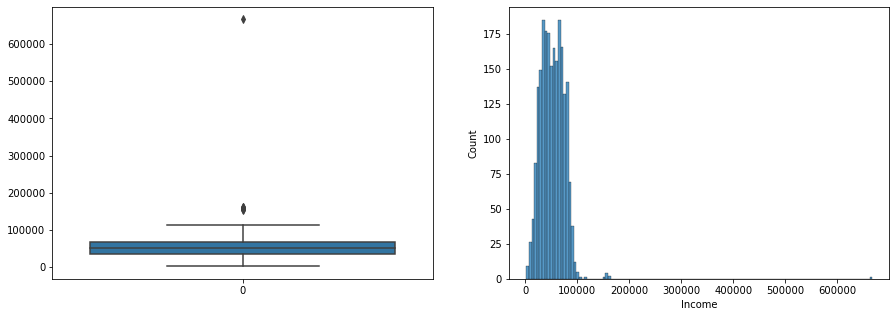

In [21]:
#check skewness of INcome to perform either mean or meadian to fill NaN valued
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = data1['Income'])
plt.subplot(1,2,2)
sns.histplot(df['Income'])

Skew in Income Column can be removed by adding Log1p

<AxesSubplot:xlabel='Income', ylabel='Count'>

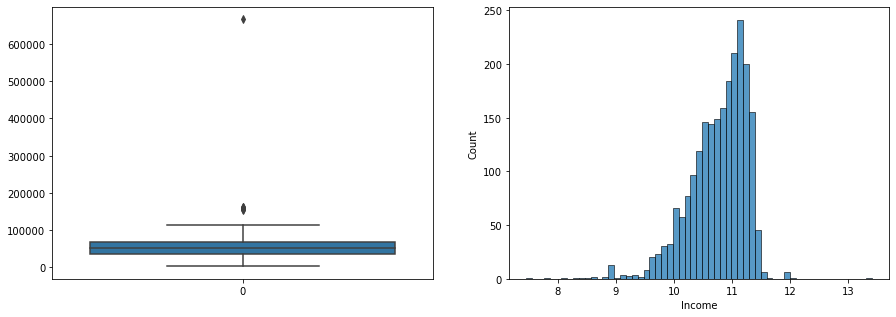

In [22]:
df['Income'] = np.log1p(df['Income'])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = data1['Income'])
plt.subplot(1,2,2)
sns.histplot(df['Income'])

In [23]:
'''#encoding the levels of categorical feature Education into numeric values.
from sklearn.preprocessing import LabelEncoder
#dsdgd
lblEn = LabelEncoder()

data1['Education'] =lblEn.fit_transform(data1['Education'])'''

"#encoding the levels of categorical feature Education into numeric values.\nfrom sklearn.preprocessing import LabelEncoder\n#dsdgd\nlblEn = LabelEncoder()\n\ndata1['Education'] =lblEn.fit_transform(data1['Education'])"

In [24]:
'''#encoding the levels of categorical feature Marital_Status into numeric values.
from sklearn.preprocessing import LabelEncoder
#dsdgd
lblEn = LabelEncoder()

data1['Marital_Status'] =lblEn.fit_transform(data1['Marital_Status'])'''

"#encoding the levels of categorical feature Marital_Status into numeric values.\nfrom sklearn.preprocessing import LabelEncoder\n#dsdgd\nlblEn = LabelEncoder()\n\ndata1['Marital_Status'] =lblEn.fit_transform(data1['Marital_Status'])"

In [25]:
data1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,tot_children,Year_Customer,age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,2012,55
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,2,2014,60
2,Graduation,Married,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,0,2013,48
3,Graduation,Married,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,2014,30
4,Higher education,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,1,2014,33


In [26]:
new_data = ['age','Income', 'Education','Marital_Status','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Response','tot_children']
final_df = data1[new_data]

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

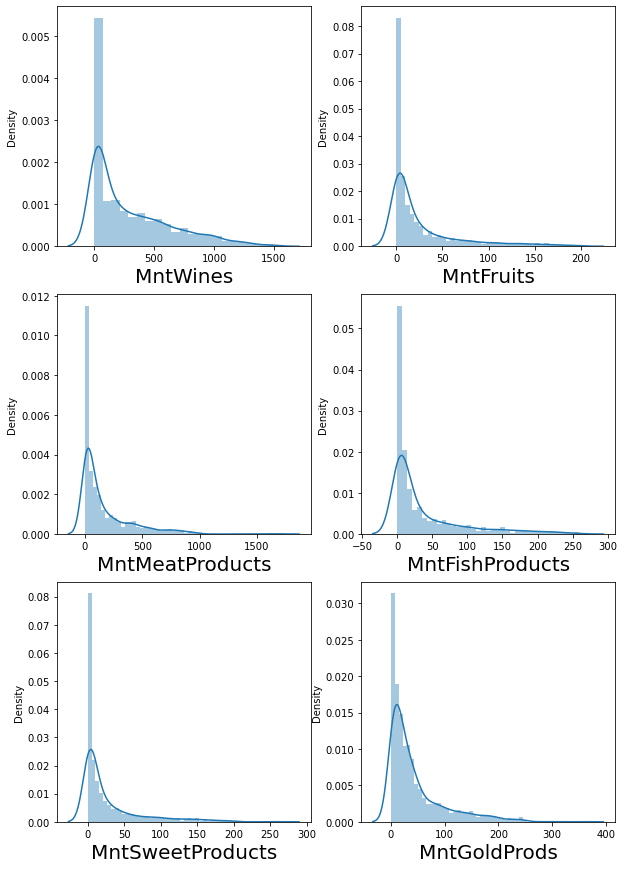

In [27]:
# let's see how data is distributed for continues columns
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(final_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

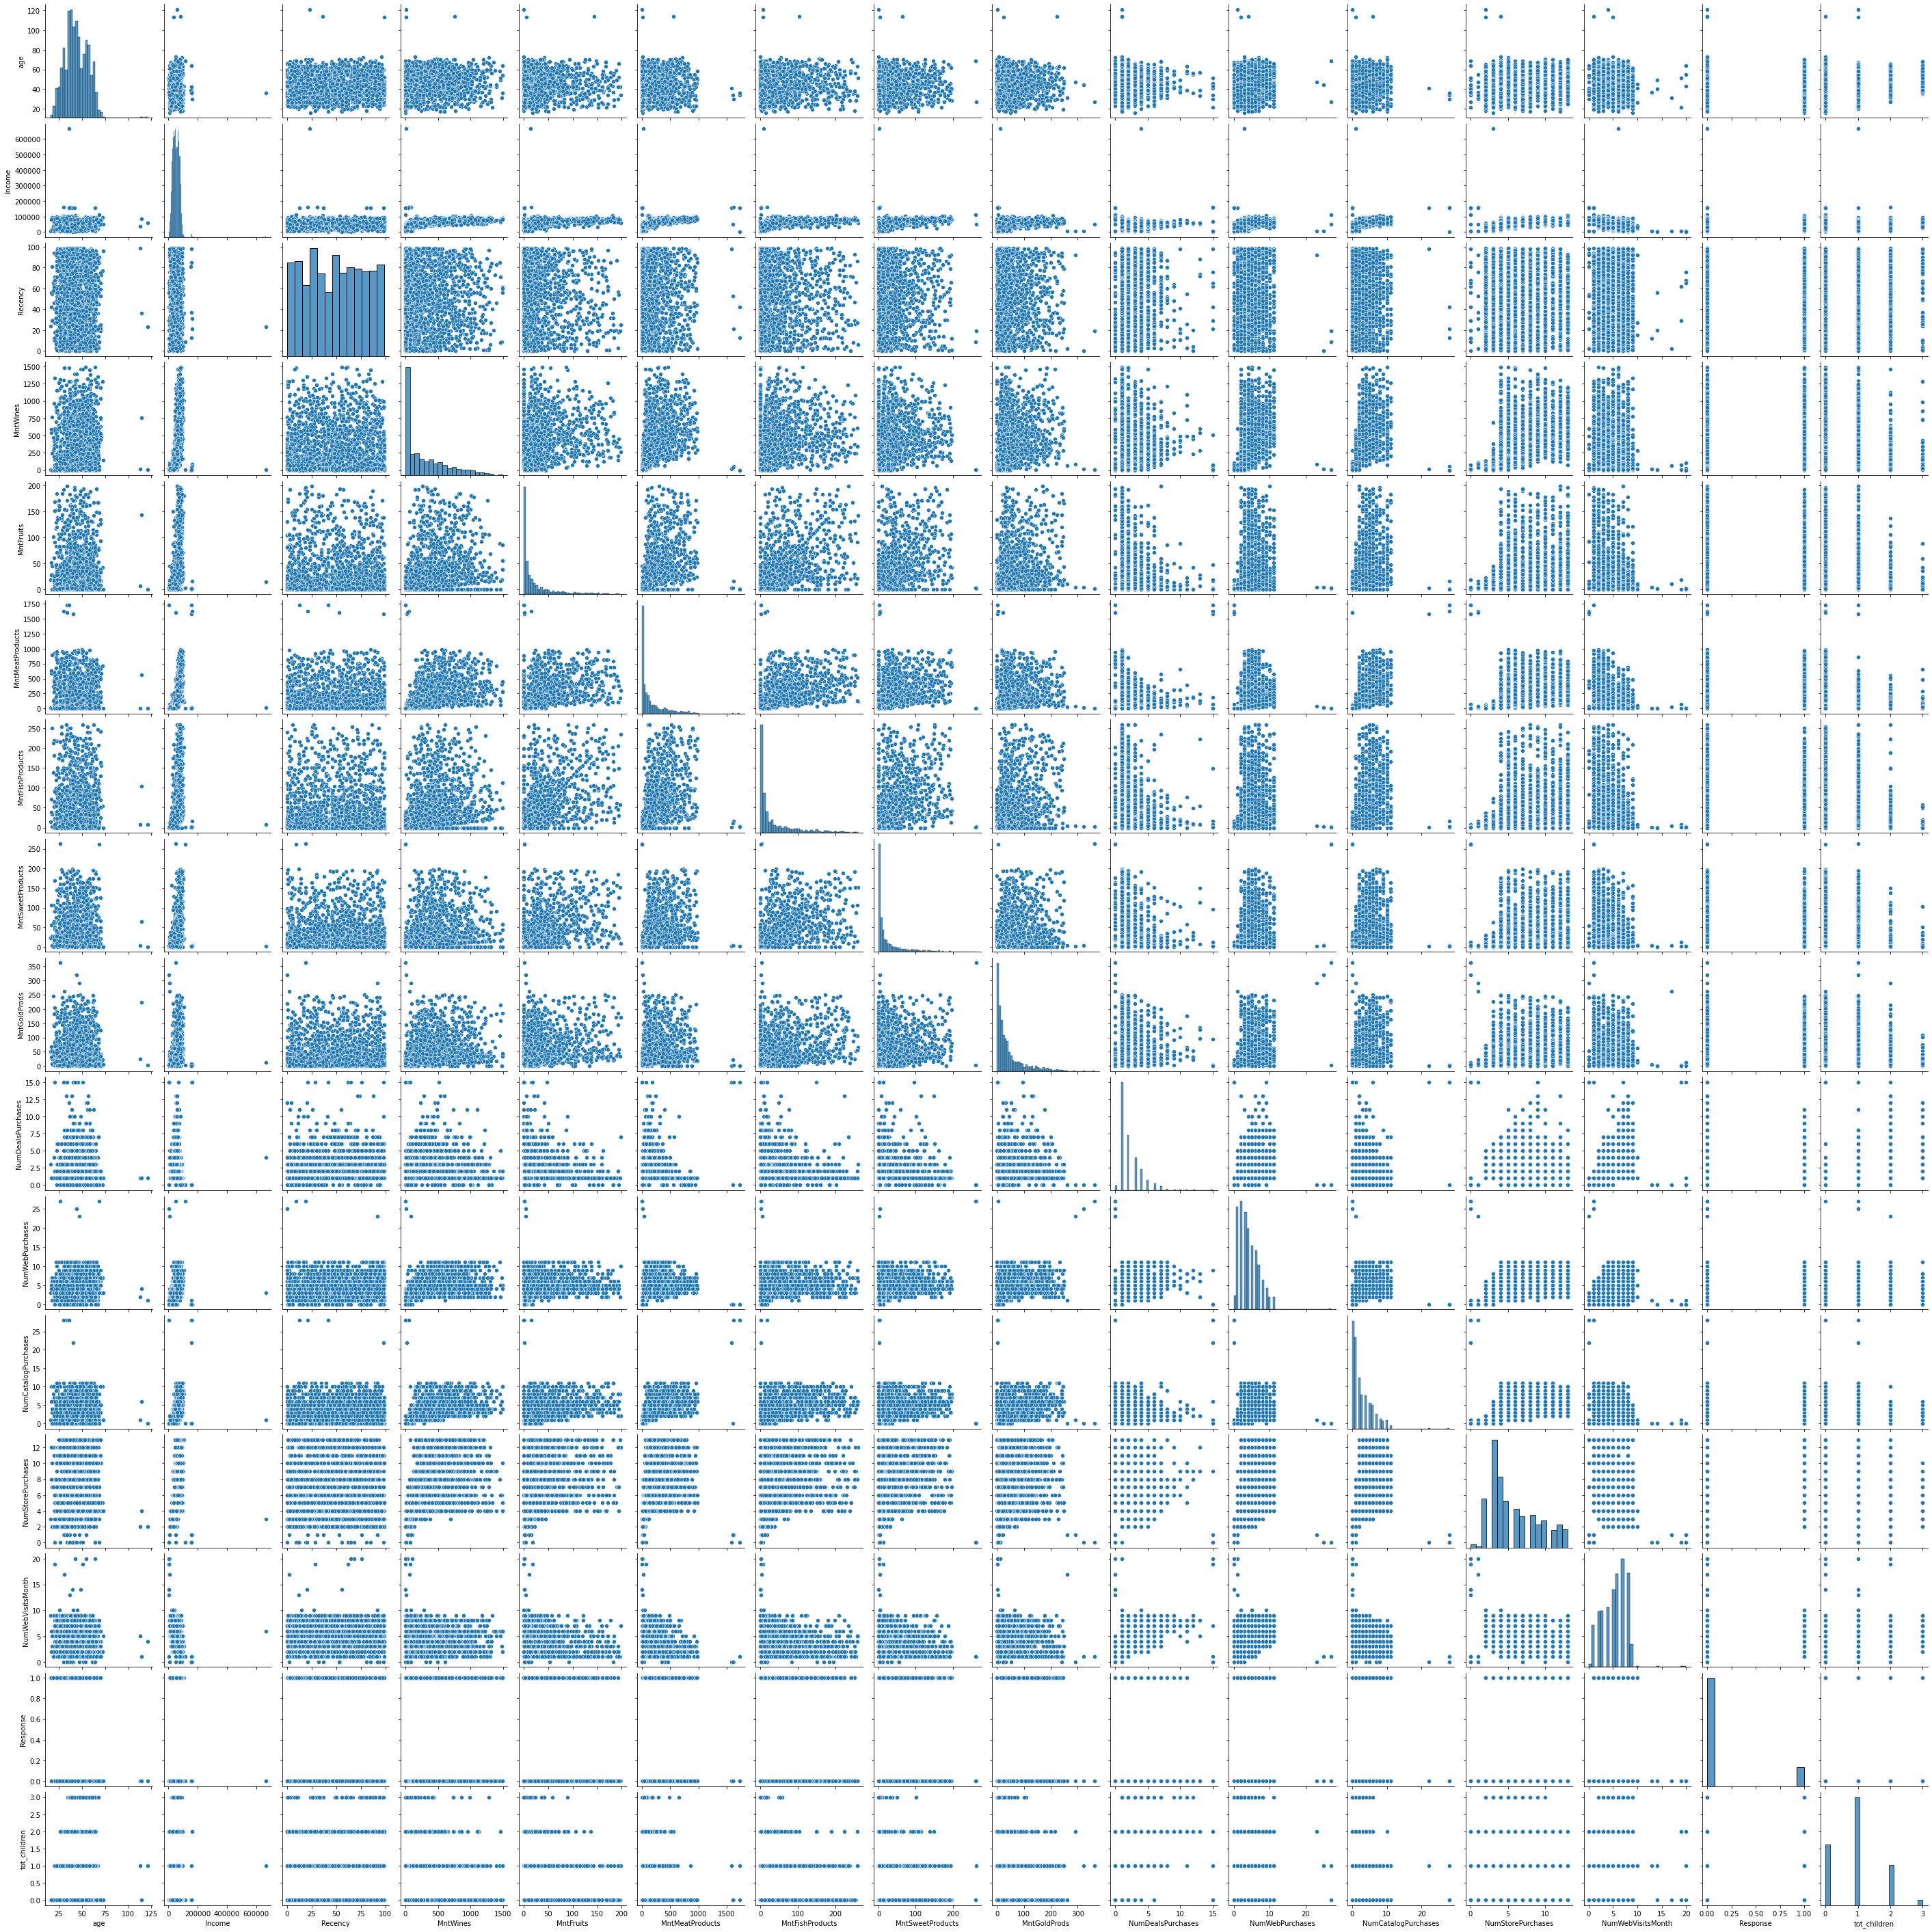

In [28]:
sns.pairplot(final_df)

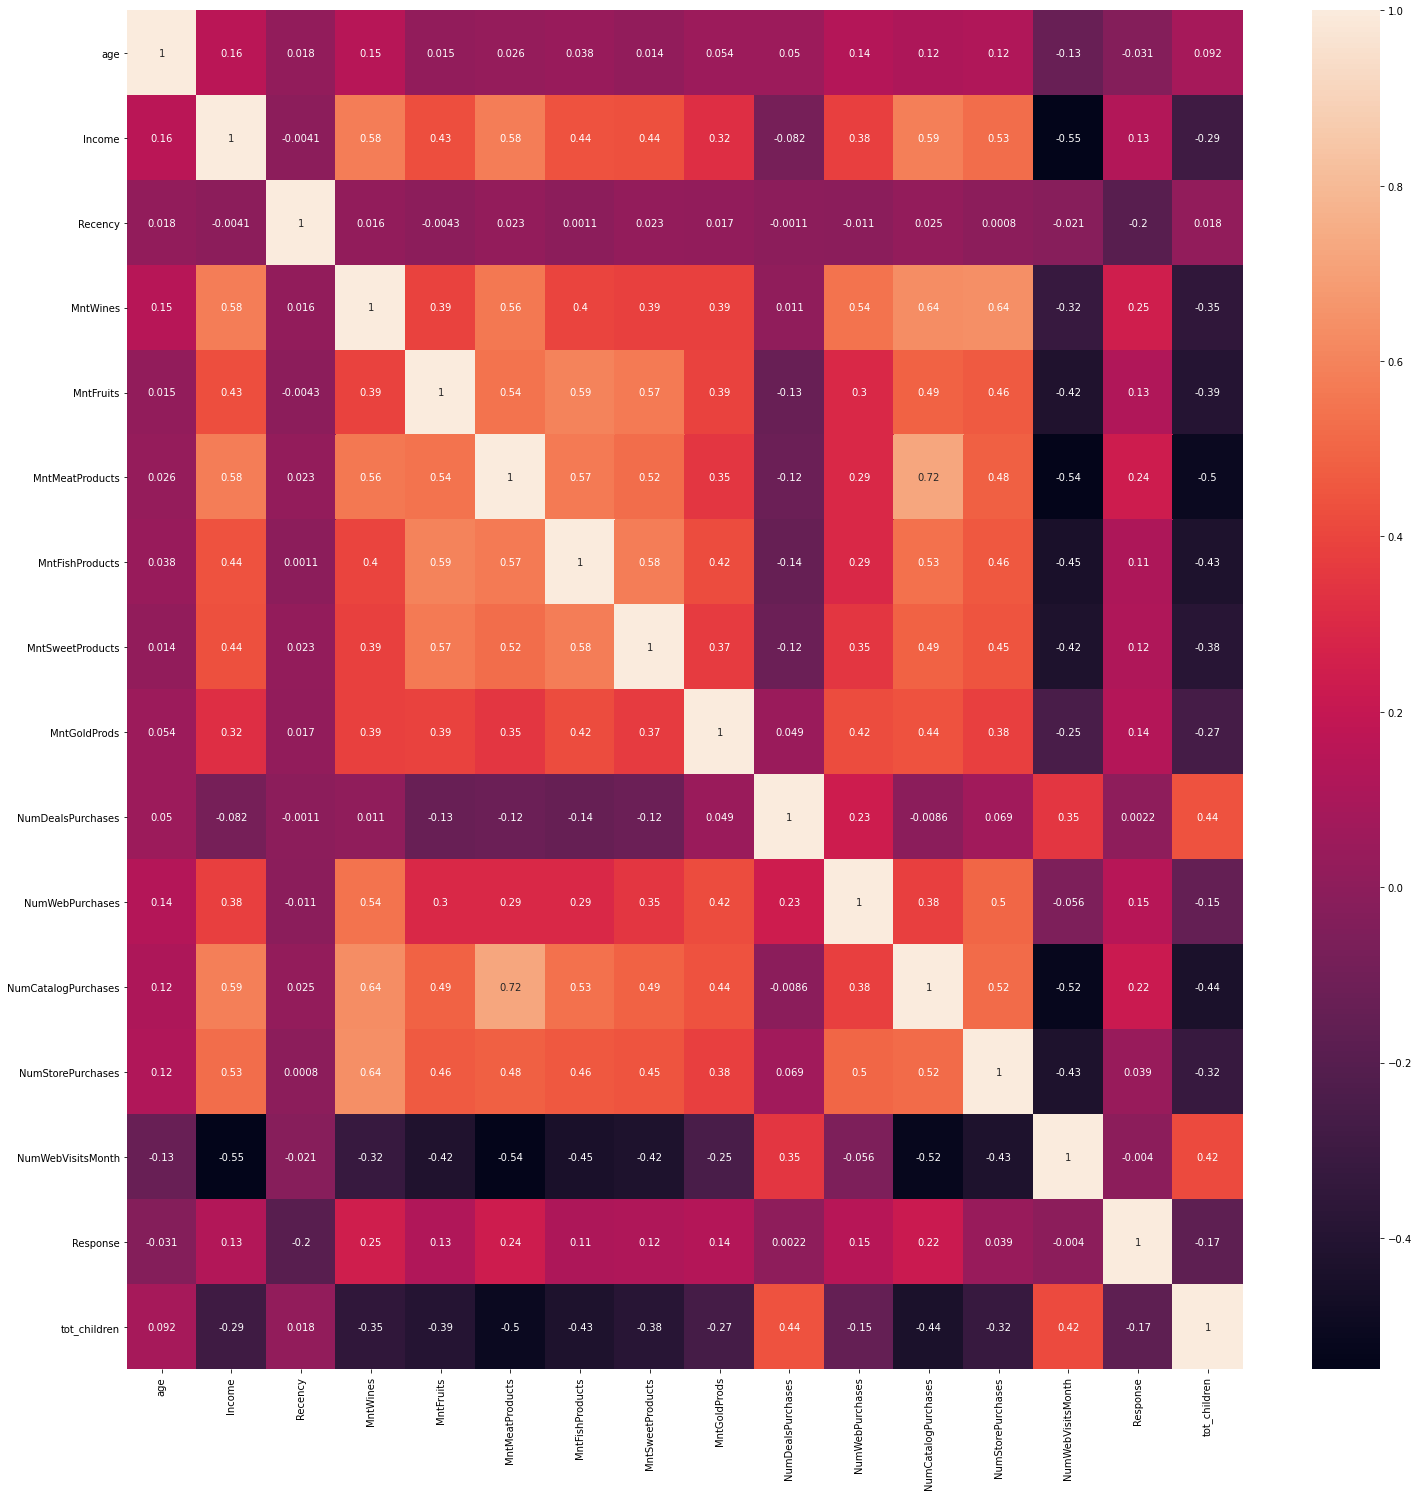

In [29]:
# heatmap for checking corelation between columns
plt.figure(figsize = (25,25))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

###### This graph shows that, there is mnt features which are highly co-related with 'Income'.  mntwine feature is highly co-related with numcatlog purchase feature. Income has a high negative correlation with "NumWebVisitsMonth" suggesting that customers with high income do not for web visits. Incme has highly corelated with numcatlog purchase feature.

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

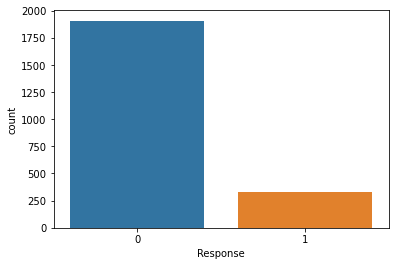

In [30]:
#now let's check distribution of Class attribute
sns.countplot(data1['Response'])

###### which shows imbalanced data at Class attbute so we need to balanced this data using imbalanced-learn.  https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/  from this article i will try for oversampling as using this method no data loss which may be useful. for over-sampling here random over sampling method is used.
One way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples.

In [31]:
#Random Over Sampling fo balancing Response data
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

# Separate input features and target
y = data1.Response
X = data1.drop('Response', axis=1)

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

rov = RandomOverSampler()
X, y= rov.fit_resample(X,y)

In [32]:
X.shape

(3812, 24)

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

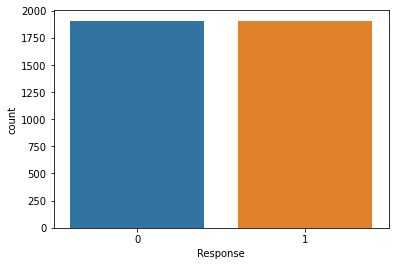

In [33]:
sns.countplot(y)    

###### From above Resampling imbalancingTechnique we get balanced data for Resource Column.

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

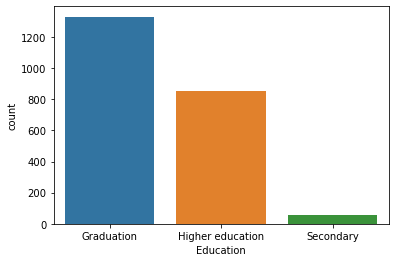

In [34]:
sns.countplot(final_df["Education"])

<AxesSubplot:xlabel='Education', ylabel='Income'>

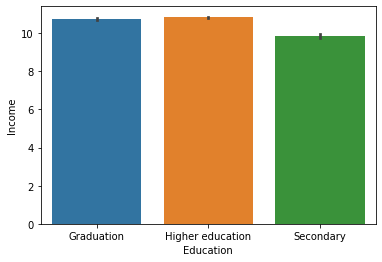

In [35]:
sns.barplot(x=final_df["Education"],y=df["Income"])

 Customers with PhD and Masters degree have slightly highest average income as compared to Graduatated customer.

In [36]:
#Calculating Maximum amount spent on the products
Products = [col for col in final_df.columns if 'Mnt' in col]
Products_total = []
for i in range(0,6):
  print("{} = ${}".format(Products[i],final_df[Products[i]].sum(axis=0)))
  Products_total.append(final_df[Products[i]].sum(axis=0))

MntWines = $680816
MntFruits = $58917
MntMeatProducts = $373968
MntFishProducts = $84057
MntSweetProducts = $60621
MntGoldProds = $98609


<AxesSubplot:>

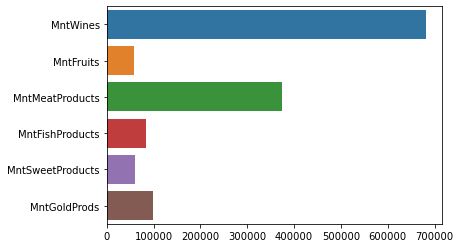

In [37]:
sns.barplot(x=Products_total, y=Products)

we can see from above graph, maximum amount spent on the mnt wines product and then on the mn meat product.

In [38]:
#Calculating total of sources of products
sources=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
sources_total = []
for i in range(0,4):
  print("{} = {}".format(sources[i],df[sources[i]].sum(axis=0)))
  sources_total.append(df[sources[i]].sum(axis=0))

NumDealsPurchases = 5208
NumWebPurchases = 9150
NumCatalogPurchases = 5963
NumStorePurchases = 12970


<AxesSubplot:>

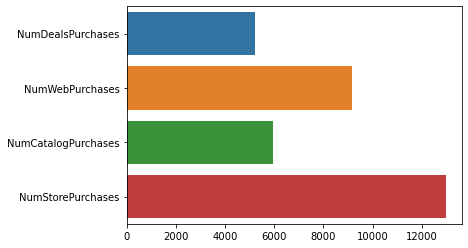

In [39]:
sns.barplot(x=sources_total, y=sources)

From above graph we can see that maximum product purchased from store source and then from web source.

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [51]:
final_df['age']=final_df['age'].astype('int32')
final_df['age'] = final_df['age'].apply(lambda x:'Senior Citizen' if x >= 60 else 'Adult' if x > 25 else 'Youth')

ValueError: invalid literal for int() with base 10: 'Senior Citizen'

<AxesSubplot:xlabel='age', ylabel='count'>

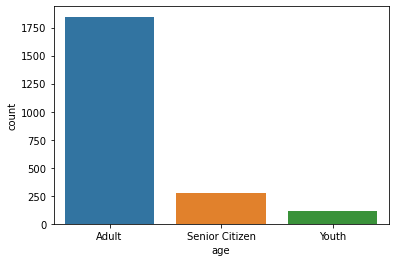

In [52]:
sns.countplot(x=data1['age'])

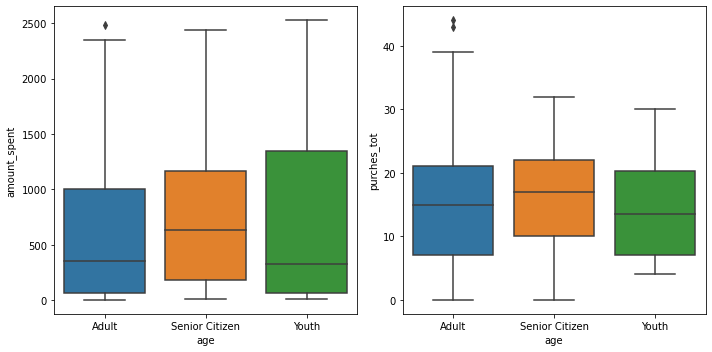

In [53]:
df1=final_df.copy()
df1['amount_spent']=final_df[Products].sum(axis=1)
df1['purches_tot']=final_df[sources].sum(axis=1)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df1['amount_spent'],x=data1['age'])
plt.subplot(1,2,2)
sns.boxplot(y=df1['purches_tot'],x=data1['age'])
plt.tight_layout()

from above graph, we can say the youth have spent more amount on purches product than others.

In [56]:
final_df.to_csv("C:/Users/Personal/Desktop/MDLP1/CPA project//final_df.csv", index=False)